In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Australia_2021

In [5]:
Australia_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
7,7,AC Agar (AUS),1,1,1,19,19*,-,33,57.57,...,31,2,2/31,15.50,3.10,30.0,0,0,0,0
8,8,WA Agar (AUS),2,2,0,50,41,25.00,42,119.04,...,39,0,-,-,3.54,-,0,0,0,0
46,46,AT Carey (AUS),3,3,0,112,67,37.33,152,73.68,...,-,-,-,-,-,-,-,-,2,1
55,55,DT Christian (AUS),1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,0,0
108,108,JR Hazlewood (AUS),2,1,1,1,1*,-,2,50.00,...,29,5,3/11,5.80,2.07,16.8,0,0,1,0
111,111,MC Henriques (AUS),3,3,0,12,7,4.00,41,29.26,...,-,-,-,-,-,-,-,-,1,0
160,160,BR McDermott (AUS),2,2,0,28,28,14.00,50,56.00,...,-,-,-,-,-,-,-,-,0,0
174,174,MR Marsh (AUS),3,3,0,57,29,19.00,60,95.00,...,26,1,1/7,26.00,4.33,36.0,0,0,2,0
187,187,RP Meredith (AUS),1,1,1,0,0*,-,0,-,...,36,0,-,-,7.20,-,0,0,0,0
244,244,JR Philippe (AUS),3,3,0,65,39,21.66,89,73.03,...,-,-,-,-,-,-,-,-,1,0


In [6]:
Australia_2021=Australia_2021.reset_index()

In [7]:
Australia_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,7,7,AC Agar (AUS),1,1,1,19,19*,-,33,...,31,2,2/31,15.50,3.10,30.0,0,0,0,0
1,8,8,WA Agar (AUS),2,2,0,50,41,25.00,42,...,39,0,-,-,3.54,-,0,0,0,0
2,46,46,AT Carey (AUS),3,3,0,112,67,37.33,152,...,-,-,-,-,-,-,-,-,2,1
3,55,55,DT Christian (AUS),1,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,0,0
4,108,108,JR Hazlewood (AUS),2,1,1,1,1*,-,2,...,29,5,3/11,5.80,2.07,16.8,0,0,1,0
5,111,111,MC Henriques (AUS),3,3,0,12,7,4.00,41,...,-,-,-,-,-,-,-,-,1,0
6,160,160,BR McDermott (AUS),2,2,0,28,28,14.00,50,...,-,-,-,-,-,-,-,-,0,0
7,174,174,MR Marsh (AUS),3,3,0,57,29,19.00,60,...,26,1,1/7,26.00,4.33,36.0,0,0,2,0
8,187,187,RP Meredith (AUS),1,1,1,0,0*,-,0,...,36,0,-,-,7.20,-,0,0,0,0
9,244,244,JR Philippe (AUS),3,3,0,65,39,21.66,89,...,-,-,-,-,-,-,-,-,1,0


In [8]:
Australia_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Australia_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,AC Agar (AUS),1,1,1,19,19*,-,33,57.57,0,...,31,2,2/31,15.50,3.10,30.0,0,0,0,0
1,WA Agar (AUS),2,2,0,50,41,25.00,42,119.04,0,...,39,0,-,-,3.54,-,0,0,0,0
2,AT Carey (AUS),3,3,0,112,67,37.33,152,73.68,0,...,-,-,-,-,-,-,-,-,2,1
3,DT Christian (AUS),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,0,0
4,JR Hazlewood (AUS),2,1,1,1,1*,-,2,50.00,0,...,29,5,3/11,5.80,2.07,16.8,0,0,1,0
5,MC Henriques (AUS),3,3,0,12,7,4.00,41,29.26,0,...,-,-,-,-,-,-,-,-,1,0
6,BR McDermott (AUS),2,2,0,28,28,14.00,50,56.00,0,...,-,-,-,-,-,-,-,-,0,0
7,MR Marsh (AUS),3,3,0,57,29,19.00,60,95.00,0,...,26,1,1/7,26.00,4.33,36.0,0,0,2,0
8,RP Meredith (AUS),1,1,1,0,0*,-,0,-,0,...,36,0,-,-,7.20,-,0,0,0,0
9,JR Philippe (AUS),3,3,0,65,39,21.66,89,73.03,0,...,-,-,-,-,-,-,-,-,1,0


In [10]:
Australia_2021_players =Australia_2021.copy()

In [11]:
Australia_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
Australia_2021_players.HS=Australia_2021_players.HS.str.extract('(\d+)')
Australia_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
Australia_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,1,1,1,19,19,-,33,57.57,0,0,...,31,2,2/31,15.50,3.10,30.0,0,0,0,0
1,2,2,0,50,41,25.00,42,119.04,0,0,...,39,0,-,-,3.54,-,0,0,0,0
2,3,3,0,112,67,37.33,152,73.68,0,1,...,-,-,-,-,-,-,-,-,2,1
3,1,-,-,-,0,-,-,-,-,-,...,-,-,-,-,-,-,-,-,0,0
4,2,1,1,1,1,-,2,50.00,0,0,...,29,5,3/11,5.80,2.07,16.8,0,0,1,0
5,3,3,0,12,7,4.00,41,29.26,0,0,...,-,-,-,-,-,-,-,-,1,0
6,2,2,0,28,28,14.00,50,56.00,0,0,...,-,-,-,-,-,-,-,-,0,0
7,3,3,0,57,29,19.00,60,95.00,0,0,...,26,1,1/7,26.00,4.33,36.0,0,0,2,0
8,1,1,1,0,0,-,0,-,0,0,...,36,0,-,-,7.20,-,0,0,0,0
9,3,3,0,65,39,21.66,89,73.03,0,0,...,-,-,-,-,-,-,-,-,1,0


In [14]:
Australia_2021_players.replace("-",0,inplace=True)

In [15]:
Australia_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Australia_2021_players_scaled = pd.DataFrame(scaler.fit_transform(Australia_2021_players),columns=Australia_2021_players.columns)
Australia_2021_players_scaled.shape
Australia_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.672857,-1.080123,1.341641,-0.636817,-0.423186,-1.117980,-0.502048,-0.098666,0.0,-0.408248,...,0.298142,-0.027996,0.046575,0.716433,0.292751,1.197822,0.0,-0.27735,-1.016950,-0.277350
1,-0.440225,0.000000,-0.745356,0.306454,0.662992,0.431757,-0.290482,1.756072,0.0,-0.408248,...,0.298142,0.181042,-0.605470,-0.738287,0.480404,-0.785953,0.0,-0.27735,-1.016950,-0.277350
2,0.792406,1.080123,-0.745356,2.192996,1.946657,1.196087,2.295315,0.387422,0.0,2.449490,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.27735,1.571651,3.605551
3,-1.672857,-2.160247,-0.745356,-1.214950,-1.361249,-1.117980,-1.277787,-1.835729,0.0,-0.408248,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.27735,-1.016950,-0.277350
4,-0.440225,-1.080123,1.341641,-1.184522,-1.311878,-1.117980,-1.230772,-0.327076,0.0,-0.408248,...,1.341641,-0.080256,1.024642,-0.193940,-0.146528,0.324961,0.0,-0.27735,0.277350,-0.277350


In [17]:
Australia_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,14.0,1.400000e+01,...,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,14.0,1.400000e+01,1.400000e+01,1.400000e+01
mean,-1.744636e-16,3.172066e-17,-6.344132e-17,-7.731910e-17,-4.758099e-17,-3.172066e-17,6.740640e-17,1.625684e-16,0.0,1.070572e-16,...,-3.172066e-17,9.516197e-17,-4.758099e-17,-6.344132e-17,-2.537653e-16,-7.930164e-18,0.0,-3.965082e-17,3.965082e-18,-6.344132e-17
std,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,0.0,1.037749e+00,...,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,0.0,1.037749e+00,1.037749e+00,1.037749e+00
min,-1.672857e+00,-2.160247e+00,-7.453560e-01,-1.214950e+00,-1.361249e+00,-1.117980e+00,-1.277787e+00,-1.835729e+00,0.0,-4.082483e-01,...,-7.453560e-01,-8.380177e-01,-6.054704e-01,-7.382873e-01,-1.029350e+00,-7.859528e-01,0.0,-2.773501e-01,-1.016950e+00,-2.773501e-01
25%,-4.402255e-01,-8.100926e-01,-7.453560e-01,-7.965641e-01,-8.675319e-01,-1.055991e+00,-4.550331e-01,-2.969029e-01,0.0,-4.082483e-01,...,-7.453560e-01,-8.380177e-01,-6.054704e-01,-7.382873e-01,-1.029350e+00,-7.859528e-01,0.0,-2.773501e-01,-1.016950e+00,-2.773501e-01
50%,7.924058e-01,0.000000e+00,-7.453560e-01,-5.868276e-02,4.584518e-02,-9.515383e-02,-1.141780e-01,8.222158e-02,0.0,-4.082483e-01,...,-7.453560e-01,-1.194502e-01,-6.054704e-01,-7.382873e-01,7.311157e-02,-7.859528e-01,0.0,-2.773501e-01,2.773501e-01,-2.773501e-01
75%,7.924058e-01,1.080123e+00,1.341641e+00,4.662019e-01,6.383060e-01,4.317566e-01,2.913219e-01,3.825189e-01,0.0,-4.082483e-01,...,2.981424e-01,1.614444e-01,4.657464e-02,6.021671e-01,8.023995e-01,8.209050e-01,0.0,-2.773501e-01,2.773501e-01,-2.773501e-01
max,7.924058e-01,1.080123e+00,1.341641e+00,2.192996e+00,1.946657e+00,1.857514e+00,2.295315e+00,1.756072e+00,0.0,2.449490e+00,...,2.385139e+00,2.219160e+00,2.980777e+00,2.077300e+00,2.041336e+00,1.991332e+00,0.0,3.605551e+00,1.571651e+00,3.605551e+00


In [18]:
X =  Australia_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[-1.67285672e+00, -1.08012345e+00,  1.34164079e+00,
        -6.36816594e-01, -4.23186316e-01, -1.11798003e+00,
        -5.02047582e-01, -9.86658947e-02,  0.00000000e+00,
        -4.08248290e-01, -2.77350098e-01, -1.66998342e-01,
        -8.44440743e-01, -1.38331526e+00, -1.67285672e+00,
        -1.27000127e-01,  2.53459380e-01,  2.98142397e-01,
        -2.79961370e-02,  4.65746433e-02,  7.16432998e-01,
         2.92750930e-01,  1.19782230e+00,  0.00000000e+00,
        -2.77350098e-01, -1.01695036e+00, -2.77350098e-01],
       [-4.40225453e-01,  0.00000000e+00, -7.45355992e-01,
         3.06454402e-01,  6.62991895e-01,  4.31756636e-01,
        -2.90482380e-01,  1.75607189e+00,  0.00000000e+00,
        -4.08248290e-01, -2.77350098e-01,  1.66998342e-01,
         9.74354704e-01, -1.37504961e+00, -4.40225453e-01,
         7.62000762e-01,  3.69043463e-01,  2.98142397e-01,
         1.81041686e-01, -6.05470363e-01, -7.38287321e-01,
         4.80403972e-01, -7.85952803e-01,  0.00000000e+

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Australia_2021_players_scaled))

False

In [23]:
Australia_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.672857,-1.080123,1.341641,-0.636817,-0.423186,-1.117980,-0.502048,-0.098666,0.0,-0.408248,...,0.298142,-0.027996,0.046575,0.716433,0.292751,1.197822,0.0,-0.277350,-1.016950,-0.277350
1,-0.440225,0.000000,-0.745356,0.306454,0.662992,0.431757,-0.290482,1.756072,0.0,-0.408248,...,0.298142,0.181042,-0.605470,-0.738287,0.480404,-0.785953,0.0,-0.277350,-1.016950,-0.277350
2,0.792406,1.080123,-0.745356,2.192996,1.946657,1.196087,2.295315,0.387422,0.0,2.449490,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.277350,1.571651,3.605551
3,-1.672857,-2.160247,-0.745356,-1.214950,-1.361249,-1.117980,-1.277787,-1.835729,0.0,-0.408248,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.277350,-1.016950,-0.277350
4,-0.440225,-1.080123,1.341641,-1.184522,-1.311878,-1.117980,-1.230772,-0.327076,0.0,-0.408248,...,1.341641,-0.080256,1.024642,-0.193940,-0.146528,0.324961,0.0,-0.277350,0.277350,-0.277350
5,0.792406,1.080123,-0.745356,-0.849813,-1.015647,-0.870022,-0.313990,-0.952865,0.0,-0.408248,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.277350,0.277350,-0.277350
6,-0.440225,0.000000,-0.745356,-0.362964,0.021159,-0.250127,-0.102424,-0.146038,0.0,-0.408248,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.277350,-1.016950,-0.277350
7,0.792406,1.080123,-0.745356,0.519451,0.070531,0.059820,0.132648,1.030712,0.0,-0.408248,...,-0.745356,-0.158645,-0.279448,1.701889,0.817326,1.594577,0.0,-0.277350,1.571651,-0.277350
8,-1.672857,-1.080123,1.341641,-1.214950,-1.361249,-1.117980,-1.277787,-1.835729,0.0,-0.408248,...,-0.745356,0.102653,-0.605470,-0.738287,2.041336,-0.785953,0.0,-0.277350,-1.016950,-0.277350
9,0.792406,1.080123,-0.745356,0.762876,0.564248,0.224712,0.814358,0.367810,0.0,-0.408248,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.277350,0.277350,-0.277350


In [24]:
np.all(np.isfinite(Australia_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


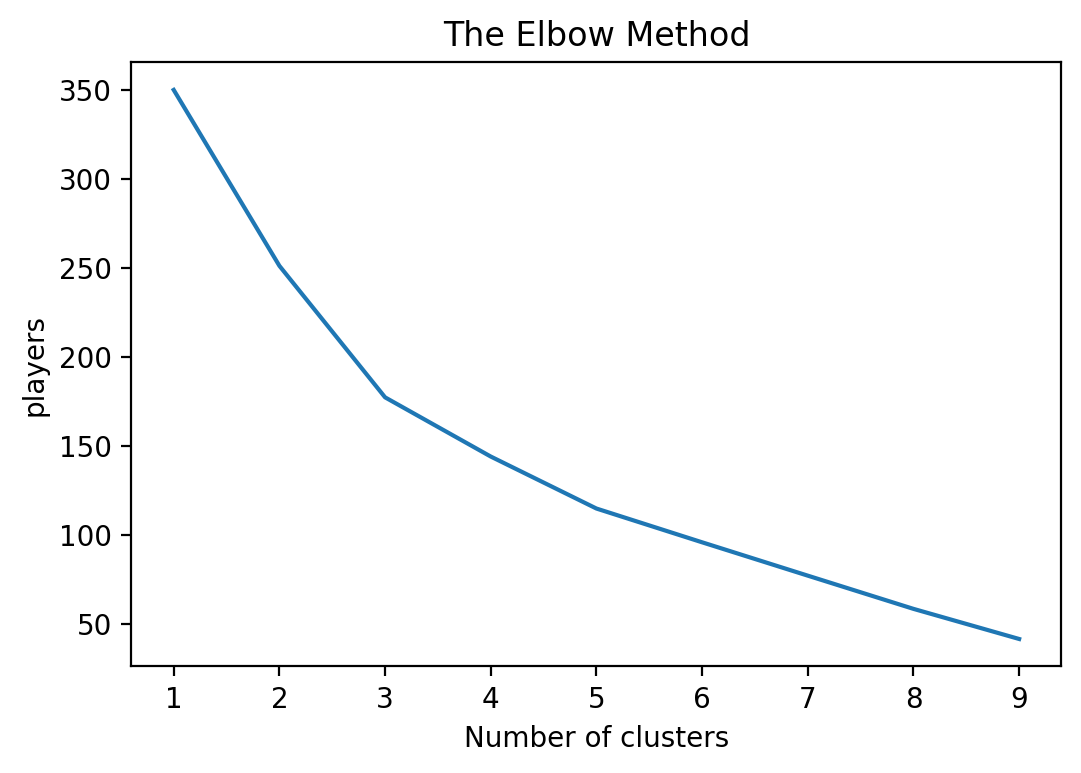

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2])

In [28]:
kmeans.cluster_centers_

array([[ 0.79240582,  1.08012345, -0.0496904 ,  1.49315017,  1.22253825,
         1.03078152,  1.58226144,  0.3698211 ,  0.        ,  1.4969104 ,
        -0.2773501 ,  1.50298508,  0.9743547 ,  0.30563218,  0.79240582,
        -1.01600102, -0.90238144, -0.74535599, -0.8380177 , -0.60547036,
        -0.73828732, -1.02935005, -0.7859528 ,  0.        , -0.2773501 ,
         0.2773501 ,  1.01695036],
       [-0.79240582, -0.6172134 ,  0.1490712 , -0.73679463, -0.68415121,
        -0.7371876 , -0.71361278, -0.49143288,  0.        , -0.40824829,
         0.2773501 , -0.73956409, -0.58461282, -0.69018162, -0.79240582,
        -0.25400025, -0.24190097, -0.1490712 , -0.33408724, -0.27944786,
        -0.45270628, -0.06001242, -0.34385435,  0.        , -0.2773501 ,
        -0.64715023, -0.2773501 ],
       [ 0.79240582,  0.27003086, -0.2236068 ,  0.16952797,  0.28036093,
         0.51699215,  0.06212629,  0.58264172,  0.        , -0.40824829,
        -0.2773501 ,  0.16699834,  0.29230641,  0.9785

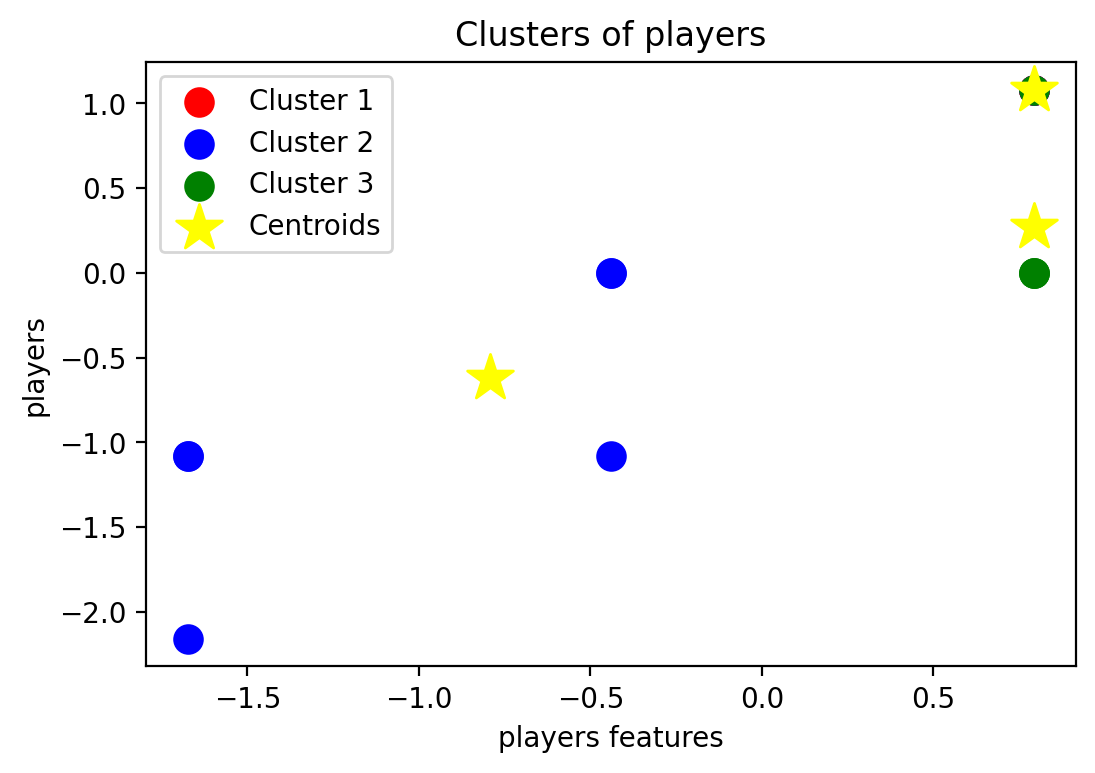

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Australia_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,AC Agar (AUS),1,1,1,19,19*,-,33,57.57,0,...,31,2,2/31,15.50,3.10,30.0,0,0,0,0
1,WA Agar (AUS),2,2,0,50,41,25.00,42,119.04,0,...,39,0,-,-,3.54,-,0,0,0,0
2,AT Carey (AUS),3,3,0,112,67,37.33,152,73.68,0,...,-,-,-,-,-,-,-,-,2,1
3,DT Christian (AUS),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,0,0
4,JR Hazlewood (AUS),2,1,1,1,1*,-,2,50.00,0,...,29,5,3/11,5.80,2.07,16.8,0,0,1,0
5,MC Henriques (AUS),3,3,0,12,7,4.00,41,29.26,0,...,-,-,-,-,-,-,-,-,1,0
6,BR McDermott (AUS),2,2,0,28,28,14.00,50,56.00,0,...,-,-,-,-,-,-,-,-,0,0
7,MR Marsh (AUS),3,3,0,57,29,19.00,60,95.00,0,...,26,1,1/7,26.00,4.33,36.0,0,0,2,0
8,RP Meredith (AUS),1,1,1,0,0*,-,0,-,0,...,36,0,-,-,7.20,-,0,0,0,0
9,JR Philippe (AUS),3,3,0,65,39,21.66,89,73.03,0,...,-,-,-,-,-,-,-,-,1,0


In [31]:
Australia_2021["cluster"] = y_kmeans

In [32]:
Australia_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,AC Agar (AUS),1,1,1,19,19*,-,33,57.57,0,...,2,2/31,15.50,3.10,30.0,0,0,0,0,1
1,WA Agar (AUS),2,2,0,50,41,25.00,42,119.04,0,...,0,-,-,3.54,-,0,0,0,0,1
2,AT Carey (AUS),3,3,0,112,67,37.33,152,73.68,0,...,-,-,-,-,-,-,-,2,1,0
3,DT Christian (AUS),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,0,0,1
4,JR Hazlewood (AUS),2,1,1,1,1*,-,2,50.00,0,...,5,3/11,5.80,2.07,16.8,0,0,1,0,1
5,MC Henriques (AUS),3,3,0,12,7,4.00,41,29.26,0,...,-,-,-,-,-,-,-,1,0,1
6,BR McDermott (AUS),2,2,0,28,28,14.00,50,56.00,0,...,-,-,-,-,-,-,-,0,0,1
7,MR Marsh (AUS),3,3,0,57,29,19.00,60,95.00,0,...,1,1/7,26.00,4.33,36.0,0,0,2,0,2
8,RP Meredith (AUS),1,1,1,0,0*,-,0,-,0,...,0,-,-,7.20,-,0,0,0,0,1
9,JR Philippe (AUS),3,3,0,65,39,21.66,89,73.03,0,...,-,-,-,-,-,-,-,1,0,0


In [33]:
Australia_2021['cluster'].value_counts()

1    7
2    4
0    3
Name: cluster, dtype: int64

In [35]:
Australia_Cluster_2021 = np.array([3,7,4])

In [36]:
Australia_Cluster_2021

array([3, 7, 4])

In [37]:
%store Australia_Cluster_2021

Stored 'Australia_Cluster_2021' (ndarray)


In [38]:
Australia_2021_players_scaled.insert(0, 'Player', Australia_2021.Player)

In [39]:
Australia_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,AC Agar (AUS),-1.672857,-1.080123,1.341641,-0.636817,-0.423186,-1.117980,-0.502048,-0.098666,0.0,...,0.298142,-0.027996,0.046575,0.716433,0.292751,1.197822,0.0,-0.277350,-1.016950,-0.277350
1,WA Agar (AUS),-0.440225,0.000000,-0.745356,0.306454,0.662992,0.431757,-0.290482,1.756072,0.0,...,0.298142,0.181042,-0.605470,-0.738287,0.480404,-0.785953,0.0,-0.277350,-1.016950,-0.277350
2,AT Carey (AUS),0.792406,1.080123,-0.745356,2.192996,1.946657,1.196087,2.295315,0.387422,0.0,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.277350,1.571651,3.605551
3,DT Christian (AUS),-1.672857,-2.160247,-0.745356,-1.214950,-1.361249,-1.117980,-1.277787,-1.835729,0.0,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.277350,-1.016950,-0.277350
4,JR Hazlewood (AUS),-0.440225,-1.080123,1.341641,-1.184522,-1.311878,-1.117980,-1.230772,-0.327076,0.0,...,1.341641,-0.080256,1.024642,-0.193940,-0.146528,0.324961,0.0,-0.277350,0.277350,-0.277350
5,MC Henriques (AUS),0.792406,1.080123,-0.745356,-0.849813,-1.015647,-0.870022,-0.313990,-0.952865,0.0,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.277350,0.277350,-0.277350
6,BR McDermott (AUS),-0.440225,0.000000,-0.745356,-0.362964,0.021159,-0.250127,-0.102424,-0.146038,0.0,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.277350,-1.016950,-0.277350
7,MR Marsh (AUS),0.792406,1.080123,-0.745356,0.519451,0.070531,0.059820,0.132648,1.030712,0.0,...,-0.745356,-0.158645,-0.279448,1.701889,0.817326,1.594577,0.0,-0.277350,1.571651,-0.277350
8,RP Meredith (AUS),-1.672857,-1.080123,1.341641,-1.214950,-1.361249,-1.117980,-1.277787,-1.835729,0.0,...,-0.745356,0.102653,-0.605470,-0.738287,2.041336,-0.785953,0.0,-0.277350,-1.016950,-0.277350
9,JR Philippe (AUS),0.792406,1.080123,-0.745356,0.762876,0.564248,0.224712,0.814358,0.367810,0.0,...,-0.745356,-0.838018,-0.605470,-0.738287,-1.029350,-0.785953,0.0,-0.277350,0.277350,-0.277350


In [40]:
Australia_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,AC Agar (AUS),-1.117980,0.716433
1,WA Agar (AUS),0.431757,-0.738287
2,AT Carey (AUS),1.196087,-0.738287
3,DT Christian (AUS),-1.117980,-0.738287
4,JR Hazlewood (AUS),-1.117980,-0.193940
5,MC Henriques (AUS),-0.870022,-0.738287
6,BR McDermott (AUS),-0.250127,-0.738287
7,MR Marsh (AUS),0.059820,1.701889
8,RP Meredith (AUS),-1.117980,-0.738287
9,JR Philippe (AUS),0.224712,-0.738287


In [41]:
Australia_2021_Ave=Australia_2021_players_scaled.mean()

In [42]:
Australia_2021_Ave

Mat_x          -1.744636e-16
Inns_x          3.172066e-17
NO             -6.344132e-17
Runs_x         -7.731910e-17
HS             -4.758099e-17
Ave_x          -3.172066e-17
BF              6.740640e-17
SR_x            1.625684e-16
100             0.000000e+00
50              1.070572e-16
0              -3.172066e-17
4s             -7.930164e-18
6s             -7.930164e-18
Unnamed: 0_y   -4.758099e-17
Mat_y          -1.744636e-16
Inns_y          3.172066e-17
Overs           0.000000e+00
Mdns           -3.172066e-17
Runs_y          9.516197e-17
Wkts           -4.758099e-17
Ave_y          -6.344132e-17
Econ           -2.537653e-16
SR_y           -7.930164e-18
4               0.000000e+00
5              -3.965082e-17
Ct              3.965082e-18
St             -6.344132e-17
dtype: float64

In [43]:
Australia_Ave_2021 =Australia_2021_Ave[['Ave_x','Ave_y']]

In [44]:
Australia_Ave_2021

Ave_x   -3.172066e-17
Ave_y   -6.344132e-17
dtype: float64

In [45]:
Australia_Ave_2021 = np.array([Australia_Ave_2021.Ave_x, Australia_Ave_2021.Ave_y])

In [46]:
Australia_Ave_2021

array([-3.17206578e-17, -6.34413157e-17])

In [47]:
%store Australia_Ave_2021

Stored 'Australia_Ave_2021' (ndarray)


In [48]:
Australia_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,AC Agar (AUS),1,1,1,19,19*,-,33,57.57,0,...,2,2/31,15.50,3.10,30.0,0,0,0,0,1
1,WA Agar (AUS),2,2,0,50,41,25.00,42,119.04,0,...,0,-,-,3.54,-,0,0,0,0,1
2,AT Carey (AUS),3,3,0,112,67,37.33,152,73.68,0,...,-,-,-,-,-,-,-,2,1,0
3,DT Christian (AUS),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,0,0,1
4,JR Hazlewood (AUS),2,1,1,1,1*,-,2,50.00,0,...,5,3/11,5.80,2.07,16.8,0,0,1,0,1
5,MC Henriques (AUS),3,3,0,12,7,4.00,41,29.26,0,...,-,-,-,-,-,-,-,1,0,1
6,BR McDermott (AUS),2,2,0,28,28,14.00,50,56.00,0,...,-,-,-,-,-,-,-,0,0,1
7,MR Marsh (AUS),3,3,0,57,29,19.00,60,95.00,0,...,1,1/7,26.00,4.33,36.0,0,0,2,0,2
8,RP Meredith (AUS),1,1,1,0,0*,-,0,-,0,...,0,-,-,7.20,-,0,0,0,0,1
9,JR Philippe (AUS),3,3,0,65,39,21.66,89,73.03,0,...,-,-,-,-,-,-,-,1,0,0
